<a href="https://colab.research.google.com/github/AliMadany/Deep-Learning-In-Computer-Vision-Models/blob/main/Image_Segmentation_using_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task 4:

Implement k-means clustering for image segmentation by grouping similar pixels based on their features. The process begins with feature extraction, where each pixel is represented by a vector capturing its characteristics like color (RGB, HSV) and spatial position (x, y coordinates). These features form the basis for clustering. The K-means algorithm then iteratively partitions the pixels into k clusters. Initially, k cluster centers (centroids) are randomly chosen in the feature space. Each pixel is then assigned to the cluster whose centroid is closest to it using Euclidean distance. The centroids are subsequently recalculated by averaging the feature vectors of all pixels assigned to each cluster. This assignment and update process repeats until the cluster assignments stabilize or a maximum number of iterations is reached. Finally, the segmented image is generated by assigning a distinct color or label to each cluster, effectively grouping similar pixels into coherent regions. Test and compare using k=2, k=5, k=10, and k=15.

In [ ]:
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

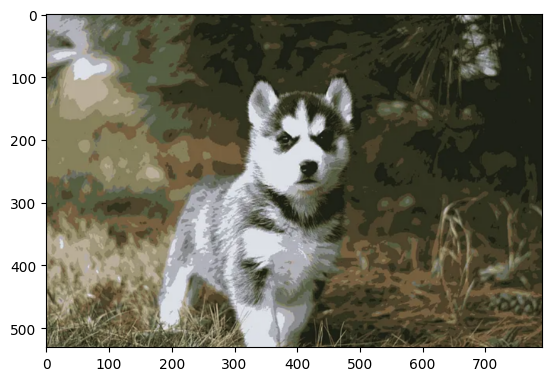

In [ ]:
dog_image = plt.imread('/content/drive/MyDrive/Deep Learning Assignments/Datasets/Task 4/Dog Image.png')
plt.imshow(dog_image)

In [ ]:
dog_image.shape

(531, 791, 4)

In [ ]:
rgb_image = dog_image[:, :, :3]

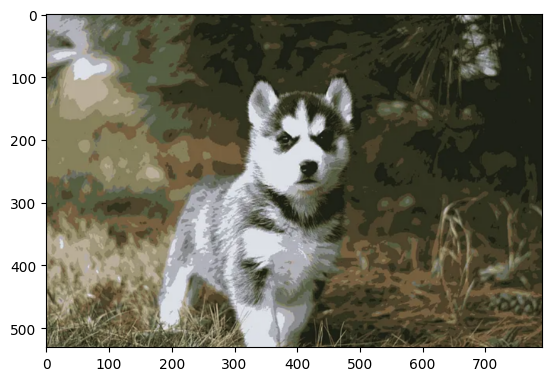

In [ ]:
plt.imshow(rgb_image)

In [ ]:
rgb_image.shape

(531, 791, 3)

In [ ]:
X = rgb_image.reshape(-1, 3)

In [ ]:
X.shape

(420021, 3)

In [ ]:
kmeans = KMeans(n_clusters=2, n_init=10)

In [ ]:
kmeans.fit(X)

KMeans(n_clusters=2, n_init=10)

In [ ]:
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(rgb_image.shape)

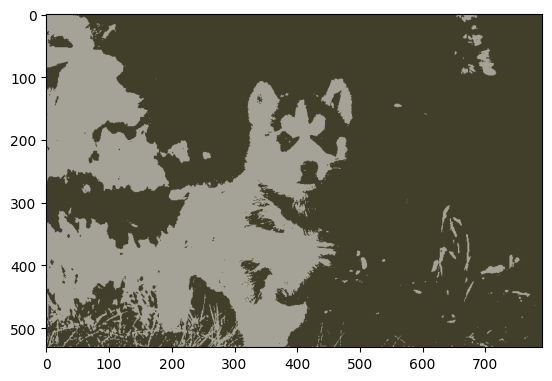

In [ ]:
plt.imshow(segmented_img)

# From Scratch

## Image Pre-processing

First, we load the image and convert it to RGB, since OpenCV loads the images as BGR.

Then, we get the dimensions of the image and assign them to the height and width variables.

We use np.meshgrid() to create coordinate matrices for every pixel in the image. (x_coords matrix and y_coords matrix)

The original image has a shape of (height, width, 3), so we flatten the image into 2D array of shape (total_pixels, 3).

Flatten the x, y coordinates.

Finally, we horizontally stack the RGB values with the x, y values, to have a final shape of (total_pixels, 5).

ex:
[
  [255, 0, 0,  0, 0],Red pixel at (0,0)
  [0, 255, 0,  1, 0], Green pixel at (1,0)
  ...
]





In [ ]:
image = cv2.imread("/content/drive/MyDrive/Deep Learning Assignments/Datasets/Task 4/Dog Image.png")

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

height, width, _ = image.shape

x_coords, y_coords = np.meshgrid(np.arange(width), np.arange(height))

rgb_values = image.reshape(-1, 3)

xy_values = np.column_stack((x_coords.flatten(), y_coords.flatten()))

features = np.hstack((rgb_values, xy_values))

print("Feature matrix shape:", features.shape)

Feature matrix shape: (420021, 5)


In [ ]:
class KMeansClustring:

  def __init__(self, k = 3, max_iterations = 200):
    self.k = k
    self.max_iterations = max_iterations
    self.centroids = None

  @staticmethod
  def euclidean_distance(data_point, centroids):
    return np.sqrt(np.sum((centroids - data_point)**2, axis = 1))

  def fit(self, X, max_iterations=200):
    # defining random centroids here but the centroids are between our range of data
    self.centroids = np.random.uniform(np.amin(X, axis=0), np.amax(X, axis=0), size = (self.k, X.shape[1]))

    for _ in range (max_iterations):
      y = []

      for data_point in X:
        # we here return a list of distances between data points and centroids
        distances = KMeansClustring.euclidean_distance(data_point, self.centroids)

        # then we retrieve the minimum distance we got so we assign THE data_point to a specific centroid
        cluster_num = np.argmin(distances)
        y.append(cluster_num)

      y = np.array(y)

      cluster_indecies = []

      for i in range(self.k):
        # here for each cluster which indecies belong to this cluster
        cluster_indecies.append(np.argwhere(y == i))

      cluster_centers = []

      # then we reposition the clusters
      for i, indecies in enumerate(cluster_indecies):

        # if a cluster is empty
        if len(indecies) == 0:
          cluster_centers.append(self.centroids[i])
        else:
          # compute the mean position of all indecies and assign this mean to the cluster point
          cluster_centers.append(np.mean(X[indecies], axis=0)[0])

      new_centroids = np.array(cluster_centers).reshape(self.k, X.shape[1])

      if np.max(self.centroids - new_centroids) < 0.0001:
        break

      self.centroids = np.array(cluster_centers)

    return y

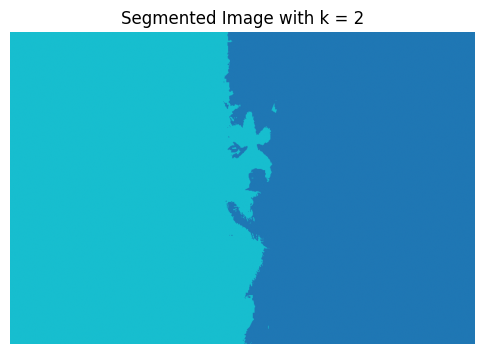

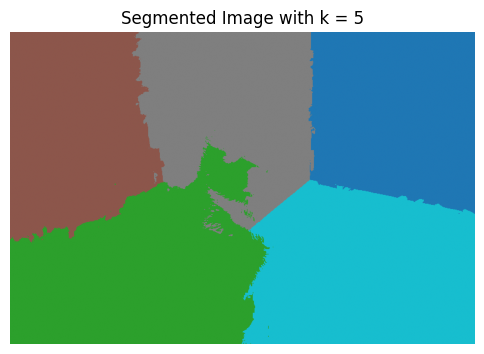

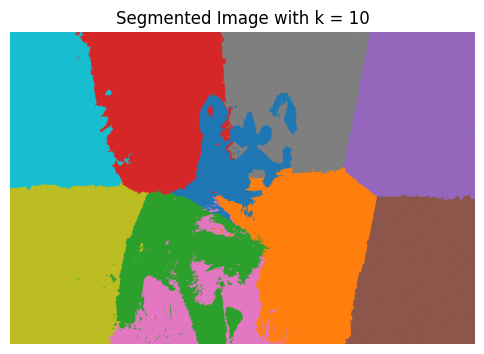

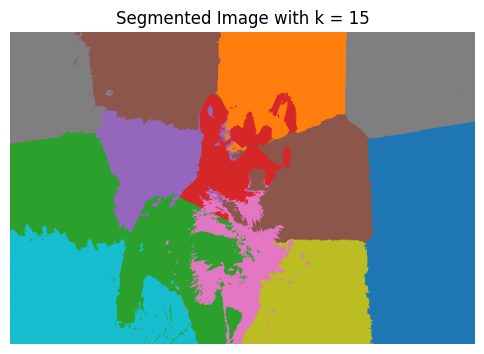

In [ ]:
# Define function to segment and visualize the image
def segment_image(image, k):
    height, width, _ = image.shape
    x_coords, y_coords = np.meshgrid(np.arange(width), np.arange(height))

    rgb_values = image.reshape(-1, 3)  # RGB Features
    xy_values = np.column_stack((x_coords.flatten(), y_coords.flatten()))  # Spatial Features

    features = np.hstack((rgb_values, xy_values))  # Combined Feature Matrix

    # Apply K-Means Clustering
    kmeans = KMeansClustring(k=k)
    labels = kmeans.fit(features)

    # Reshape labels to reconstruct the segmented image
    segmented_image = labels.reshape(height, width)

    # Show Segmentation Results
    plt.figure(figsize=(6, 6))
    plt.imshow(segmented_image, cmap="tab10")  # Assign different colors to each cluster
    plt.title(f"Segmented Image with k = {k}")
    plt.axis("off")
    plt.show()

# Test K-Means segmentation with different k values
for k in [2, 5, 10, 15]:
    segment_image(image, k)
